In [1]:
import albumentations as A
import cv2

In [2]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
],bbox_params=A.BboxParams(format='yolo',label_fields=['class_labels']))

In [10]:
transform[1](image=img, bboxes=bboxes, class_labels=class_labels

RandomRotate90(p=0.5)

In [3]:
import os
imagesTransformed=[]
from matplotlib import pyplot as plt
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)


In [44]:


### Setup variables
image_folder = './data100'
label_folder = './data100'

## Model
### Iterate over images and labels in a folder and read them using cv2
images = []
labels = []

transformedDataFolder = './transformedData'
os.makedirs(transformedDataFolder, exist_ok=True)



for img_file in os.listdir(image_folder):
    try:
        
        class_labels=[]
        bboxes=[]
       
        if img_file.endswith(('.jpg')):
            img_path = os.path.join(image_folder, img_file)
            label_path = os.path.join(label_folder, img_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))
    
            img = cv2.imread(img_path)
            with open(label_path, 'r') as f:
                text = f.read().strip()
                lines = text.strip().split('\n')
                for line in lines:
                    parts = line.split()
                    class_labels.append(parts[0])
                    bboxes.append([float(x) for x in parts[1:]])
    
                    
            # print(class_labels)
            # print(bboxes)
            # break
            counter=0
            for trans in transform:               
                transformed = transform(image=img, bboxes=bboxes, class_labels=class_labels)
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['class_labels']
                
                output_image_file = f"{os.path.splitext(img_file)[0]}_{counter}{os.path.splitext(img_file)[1]}"
                output_path = os.path.join(transformedDataFolder, output_image_file)
                
                label_file = f"{os.path.splitext(img_file)[0]}_{counter}.txt"
                label_path = os.path.join(transformedDataFolder, label_file)   
                           
                # output_path = os.path.join(transformedDataFolder,img_file)
                # label_path = os.path.join(transformedDataFolder, img_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))
        
                cv2.imwrite(output_path, transformed_image)
        
                for x,y in zip(transformed_labels,transformed_bboxes):
                    string=string+"".join(str(y).replace("(", " ").replace(")", " "))
                
                
                with open(label_path, 'w') as file:
                    file.write(string)
                counter=counter+1

            
            
            
            
            
            
    
            # output_path = os.path.join(transformedDataFolder,img_file)
            # label_path = os.path.join(transformedDataFolder, img_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))
    
            # cv2.imwrite(output_path, transformed_image)
    
            # for x,y in zip(transformed_labels,transformed_bboxes):
            #     string=x+"".join(str(y).replace("(", " ").replace(")", " "))
            
            # with open(label_path, 'w') as file:
            #     file.write(string)
            # # visualize(transformed_image)
            
    except Exception as e:
        print(e)
        continue
        




list index out of range


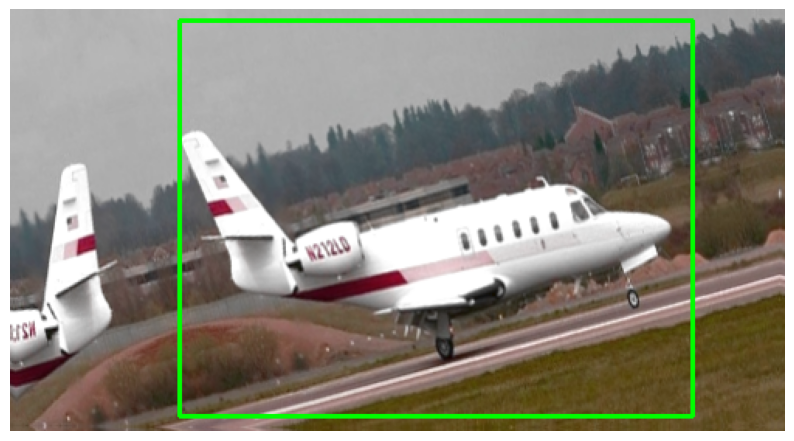

In [45]:
def draw_and_plot_yolo_boxes(image, boxes):
    height, width, _ = image.shape
    for box in boxes:
        x_center, y_center, box_width, box_height = box
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height
        
        x1 = int(x_center - (box_width / 2))
        y1 = int(y_center - (box_height / 2))
        x2 = int(x_center + (box_width / 2))
        y2 = int(y_center + (box_height / 2))
        
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Convert BGR image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

draw_and_plot_yolo_boxes(transformed_image, transformed_bboxes)